In [28]:
import os
from glob import glob
from satpy import Scene
from pyresample.utils import get_area_def
import numpy as np
import matplotlib.pyplot as plt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Search HSD files.

> Find more details about the file format [here][../doc/HS_D_users_guide_en_v13.pdf]

In [1]:
projectDir = os.path.dirname(os.path.abspath(os.path.curdir))
filenames = glob('/Users/yinzhenping/Downloads/*20200219_0400_B01_*S0[1234]10.DAT*')   # replace the path with the HSD path in your machine. A better way is to mount the [JAXA ftp server](https://www.eorc.jaxa.jp/) to your machine and then specify the mount point here.

print('Found {0:d} HSD files'.format(len(filenames)))
for file in filenames:
    print(os.path.basename(file))

NameError: name 'os' is not defined

Load HSD files!
Create scenes with using SatPy

A brief tutorial for using SatPy can be found [here](https://nbviewer.jupyter.org/github/pytroll/tutorial-satpy-half-day/tree/master/)

In [30]:
h8_scene = Scene(reader='ahi_hsd', filenames=filenames, sensor='ahi')

Check available compositors.

If the memory of your machine is large enough (> 10GB), you can try 'true_color', which will combine R, G, B channels and apply multiple corrections to create a best true-color image.

Click [here](https://github.com/pytroll/pytroll-examples/blob/master/satpy/ahi_true_color_pyspectral.ipynb) to see an example!

In [31]:
print(h8_scene.available_composite_names())

[]


Load data

In [32]:
h8_scene.load(['B01'])

Define your interested region and projection. (here, 'eqc' stands for 'PlateCarree', which is a evenly distributed lon-lat coordinate system)

In [33]:
from pyresample import create_area_def
my_area = create_area_def('my_area', {'proj': 'eqc', 'ellps': 'WGS84'},
                          width=1000, height=1000,
                          area_extent=[100, 20, 130, 50], units='degrees')
new_scn = h8_scene.resample(my_area)

In [34]:
# h8_scene.resample(h8_scene.min_area(), resampler='native')   # Harmonize the resolution of used band data to the coarsest mode.

Have a quicklook of the data

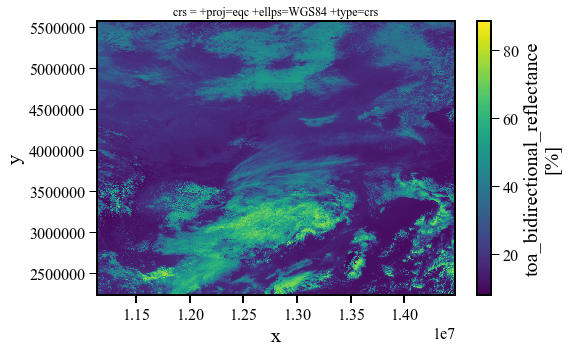

In [35]:
plt.figure(figsize=[8, 5])
new_scn['B01'].plot.imshow()

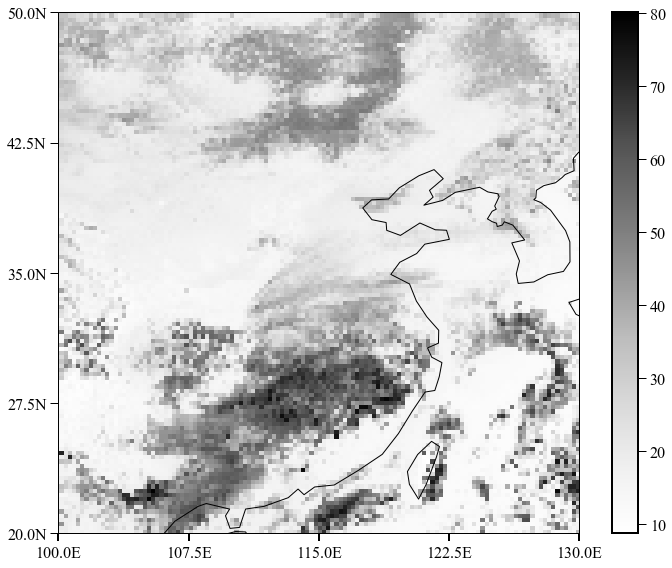

In [36]:
crs = my_area.to_cartopy_crs()   # convert scene projection to cartopy supportive projection

fig = plt.figure(figsize=[10, 8])
ax = plt.axes(projection=ccrs.PlateCarree())
axLonRange = [100, 130]
axLatRange = [20, 50]
ax.coastlines()
ax.set_global()
plt.imshow(new_scn['B01'], transform=crs, origin='upper', extent=crs.bounds, cmap='Greys')
cbar = plt.colorbar()

ax.set_xticks(np.linspace(axLonRange[0], axLonRange[1], 5, endpoint=True))
ax.set_yticks(np.linspace(axLatRange[0], axLatRange[1], 5, endpoint=True))
lon_formatter = LongitudeFormatter(number_format='5.1f',
                                   degree_symbol='',
                                   dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='4.1f',
                                  degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_ylim(axLatRange)
ax.set_xlim(axLonRange)

plt.tight_layout(True)
plt.show()